# Naive Bayes Classifier

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [30]:
nb_data = pd.read_csv('Clustering_Data_Final.csv')
nb_data = nb_data.drop('Date',axis=1)
nb_data.head()

,Division,tmpc,pcpn,pdsi,sp01,sp09,sp24,cddc,hddc,PM2.5,OZONE
0,1,30.6,0.87,1.42,1.37,0.04,0.85,0.0,1066.0,4.410000,37.661290
1,1,29.8,0.62,1.48,0.40,0.47,0.94,0.0,986.0,6.533333,38.428571
2,1,37.3,1.57,1.94,1.13,1.11,1.09,0.0,859.0,6.712903,44.290323
3,1,49.3,0.70,1.20,-0.79,0.37,0.50,0.0,471.0,3.613333,45.783333
4,1,52.3,2.49,1.63,0.54,0.73,0.24,0.0,394.0,3.723333,47.870968


In [31]:
features = ['tmpc','pcpn','pdsi','sp01','sp09','sp24','cddc','hddc','PM2.5','OZONE']
target = 'Division'

X = nb_data[features]
y = nb_data[target]

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=1111)

In [32]:
nb = GaussianNB()
nb.fit(X_train,y_train)

y_predictions = nb.predict(X_test)

In [33]:
print('Accuracy Score:',accuracy_score(y_test,y_predictions))
print(classification_report(y_test,y_predictions))

Accuracy Score: 0.5
              precision    recall  f1-score   support

           1       0.57      0.38      0.46        21
           2       0.41      0.63      0.50        19
           4       0.59      0.50      0.54        20

    accuracy                           0.50        60
   macro avg       0.52      0.50      0.50        60
weighted avg       0.53      0.50      0.50        60



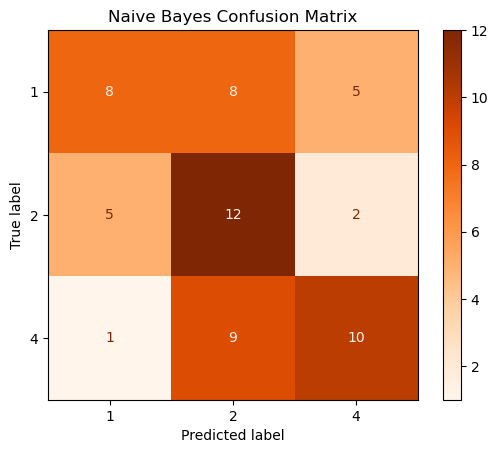

In [34]:
confmat = confusion_matrix(y_test,y_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=confmat, display_labels=nb.classes_)
disp.plot(cmap='Oranges', values_format='d')
plt.title("Naive Bayes Confusion Matrix")
plt.show()

In [35]:
nb_data_yearly = pd.read_csv('Clustering_Data_Final.csv')
nb_data_yearly['Date'] = pd.to_datetime(nb_data_yearly['Date'])
nb_data_yearly['Year'] = nb_data_yearly['Date'].dt.year
nb_data_yearly

,Division,Date,tmpc,pcpn,pdsi,sp01,sp09,sp24,cddc,hddc,PM2.5,OZONE,Year
0,1,2019-01-01,30.6,0.87,1.42,1.37,0.04,0.85,0.0,1066.0,4.410000,37.661290,2019
1,1,2019-02-01,29.8,0.62,1.48,0.40,0.47,0.94,0.0,986.0,6.533333,38.428571,2019
2,1,2019-03-01,37.3,1.57,1.94,1.13,1.11,1.09,0.0,859.0,6.712903,44.290323,2019
3,1,2019-04-01,49.3,0.70,1.20,-0.79,0.37,0.50,0.0,471.0,3.613333,45.783333,2019
4,1,2019-05-01,52.3,2.49,1.63,0.54,0.73,0.24,0.0,394.0,3.723333,47.870968,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,4,2025-03-01,40.5,1.43,-1.11,0.39,-0.16,1.15,0.0,760.0,3.048387,30.512903,2025
233,4,2025-04-01,43.8,0.83,-1.84,-1.79,-0.31,1.10,0.0,636.0,4.573333,35.663333,2025
234,4,2025-05-01,52.4,2.83,-1.74,0.43,-0.36,0.61,0.0,391.0,3.900000,40.832258,2025
235,4,2025-06-01,64.2,2.20,-1.68,0.49,0.03,0.01,70.0,94.0,5.520000,40.550000,2025


In [36]:
nb_data_yearly = nb_data_yearly.groupby(['Division','Year'],as_index=False).agg(
    {'tmpc':'mean','pcpn':'sum','pdsi':'mean','sp01':'mean','sp09':'mean','sp24':'mean',
     'cddc':'sum','hddc':'sum','PM2.5':'mean','OZONE':'mean'}).reset_index(drop=True)
nb_data_yearly

,Division,Year,tmpc,pcpn,pdsi,sp01,sp09,sp24,cddc,hddc,PM2.5,OZONE
0,1,2019,49.500000,14.66,0.645000,0.155833,0.197500,0.046667,709.0,6329.0,4.935095,45.802874
1,1,2020,51.391667,10.37,-2.715000,-0.625000,-1.444167,-0.887500,771.0,5690.0,5.988159,47.709457
2,1,2021,51.133333,15.18,-0.185000,-0.150000,-0.028333,-1.217500,700.0,5705.0,5.963682,49.787817
3,1,2022,50.133333,13.56,-2.450000,-0.262500,-0.645833,-0.700000,723.0,6097.0,4.481016,47.927207
4,1,2023,50.133333,17.44,-0.487500,0.261667,0.317500,-0.321667,608.0,5989.0,5.350983,48.182332
5,1,2024,51.841667,17.13,-0.271667,0.384167,0.323333,0.420833,751.0,5520.0,5.134414,46.944872
6,1,2025,49.357143,8.89,-0.887143,-0.132857,0.464286,0.641429,365.0,3646.0,2.723233,38.971235
7,2,2019,42.433333,22.65,0.131667,0.198333,0.510000,-1.073333,127.0,8329.0,5.858601,46.282884
8,2,2020,44.300000,13.69,-3.783333,-0.670833,-1.553333,-0.725833,181.0,7694.0,6.909411,45.186437
9,2,2021,44.866667,19.53,-5.527500,-0.114167,-1.236667,-1.955833,197.0,7507.0,6.725358,46.650004


In [37]:
X_yearly = nb_data_yearly[features]
y_yearly = nb_data_yearly[target]

X_yearly_scaled = sc.fit_transform(X_yearly)

X_yearly_train, X_yearly_test, y_yearly_train, y_yearly_test = train_test_split(X_yearly_scaled,y_yearly,test_size=0.25,random_state=1111)

nb.fit(X_yearly_train,y_yearly_train)

y_yearly_predictions = nb.predict(X_yearly_test)

In [38]:
print('Accuracy Score:',accuracy_score(y_yearly_test,y_yearly_predictions))
print(classification_report(y_yearly_test,y_yearly_predictions))

Accuracy Score: 0.6666666666666666
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.67      0.67      0.67         3
           4       0.00      0.00      0.00         1

    accuracy                           0.67         6
   macro avg       0.56      0.56      0.56         6
weighted avg       0.67      0.67      0.67         6

